In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [54]:
data = 'Data/data (6).csv'

In [55]:
df = pd.read_csv(data)

In [56]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [57]:
df.isna().sum()

State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [59]:
level = 'VitD_levels'
doc = 'Doc_visits'
charge = 'TotalCharge'

In [60]:
df[level].head(5)

0    19.141466
1    18.940352
2    18.057507
3    16.576858
4    17.439069
Name: VitD_levels, dtype: float64

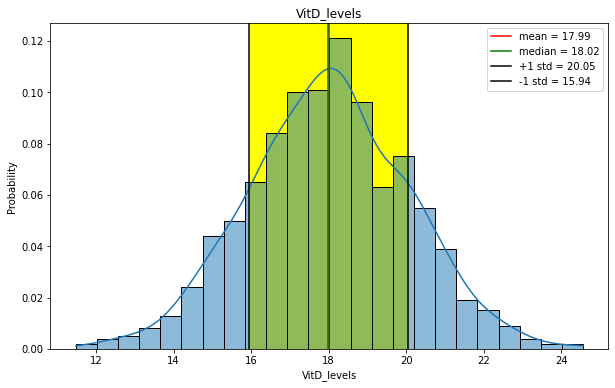

In [61]:
df_level = df[level]
mean_level = df_level.mean()
median_level = df_level.median()
std_level = df_level.std()
plus_one_level = mean_level + std_level
minus_one_level = mean_level - std_level
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df_level,ax=ax,stat='probability',kde=True)
ax.axvline(mean_level,color='red',label=f'mean = {mean_level:,.2f}',)
ax.axvline(median_level,color='green',label=f'median = {median_level:,.2f}',)
ax.axvline(plus_one_level,color='black',label=f'+1 std = {plus_one_level:,.2f}',)
ax.axvline(minus_one_level,color='black',label=f'-1 std = {minus_one_level:,.2f}',)
ax.set_title(f'{level}')
ax.legend()
ax.axvspan(plus_one_level,minus_one_level,color='yellow',zorder=0)

In [69]:
kurt_level = stats.kurtosis(df_level,fisher=False)
kurt_level

3.013147515833447

1.continuous
2.no
3.Mesokurtic

In [63]:
df[doc].head(5)

0    6
1    4
2    4
3    4
4    5
Name: Doc_visits, dtype: int64

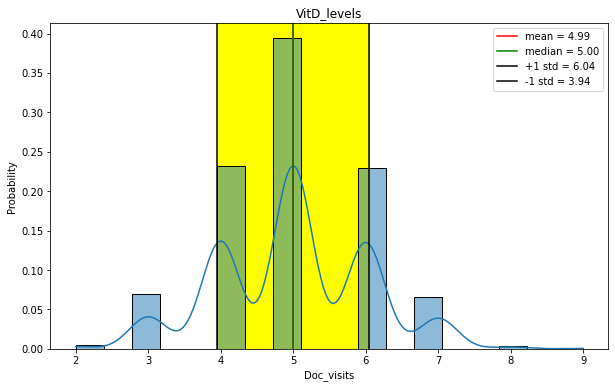

In [64]:
df_doc = df[doc]
mean_doc = df_doc.mean()
median_doc = df_doc.median()
std_doc = df_doc.std()
plus_one_doc = mean_doc + std_doc
minus_one_doc = mean_doc - std_doc
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df_doc,ax=ax,stat='probability',kde=True)
ax.axvline(mean_doc,color='red',label=f'mean = {mean_doc:,.2f}',)
ax.axvline(median_doc,color='green',label=f'median = {median_doc:,.2f}',)
ax.axvline(plus_one_doc,color='black',label=f'+1 std = {plus_one_doc:,.2f}',)
ax.axvline(minus_one_doc,color='black',label=f'-1 std = {minus_one_doc:,.2f}',)
ax.set_title(f'{level}')
ax.legend()
ax.axvspan(plus_one_doc,minus_one_doc,color='yellow',zorder=0)

In [72]:
kurt_doc = stats.kurtosis(df_doc,fisher=False)
kurt_doc

2.9919958083381206

1.discrete
2.No skew
3.Mesokurtic

In [65]:
df[charge].head(5)

0    3726.702860
1    4193.190458
2    2434.234222
3    2127.830423
4    2113.073274
Name: TotalCharge, dtype: float64

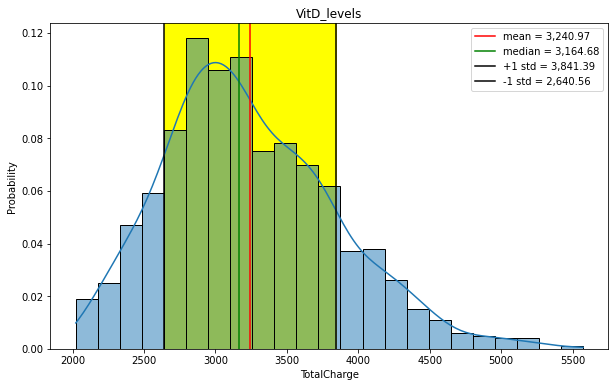

In [66]:
df_charge = df[charge]
mean_charge = df_charge.mean()
median_charge = df_charge.median()
std_charge = df_charge.std()
plus_one_charge = mean_charge + std_charge
minus_one_charge = mean_charge - std_charge
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df_charge,ax=ax,stat='probability',kde=True)
ax.axvline(mean_charge,color='red',label=f'mean = {mean_charge:,.2f}',)
ax.axvline(median_charge,color='green',label=f'median = {median_charge:,.2f}',)
ax.axvline(plus_one_charge,color='black',label=f'+1 std = {plus_one_charge:,.2f}',)
ax.axvline(minus_one_charge,color='black',label=f'-1 std = {minus_one_charge:,.2f}',)
ax.set_title(f'{level}')
ax.legend()
ax.axvspan(plus_one_charge,minus_one_charge,color='yellow',zorder=0)

In [71]:
kurt_charge = stats.kurtosis(df_charge,fisher=False)
kurt_charge

3.2650077463439384

1.continuous
2.positive skew
3.Leptokurtic